# Project: Bank Loan Modelling to predict the likelihood of customers buying personal loans

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Read file

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Here the Independent variable/Target variable is the 'Personal Loan' column. The rest are Dependent
# variables. The columns 'ID' and 'Zip Code' do not contribute to our outcome and hence can be dropped.

df = df.drop(['ID', 'ZIP Code'], axis = 1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 12)

In [5]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Explolatory Data Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#### Observations:

## Replace negative values in the 'Experience' column with median

In [7]:
df.median()

Age                   45.0
Experience            20.0
Income                64.0
Family                 2.0
CCAvg                  1.5
Education              2.0
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
Online                 1.0
CreditCard             0.0
dtype: float64

In [8]:
df[df['Experience']<0].head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [9]:
df.loc[df['Experience']<0]=np.nan
Filler = lambda x: x.fillna(x.median())
df = df.apply(Filler)


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.561800,11.261791,24.0,36.0,46.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.712400,45.882942,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.387400,1.143146,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.931392,1.739143,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.880200,0.835456,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.045400,101.460724,0.0,0.0,0.0,100.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.103200,0.304250,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


### Check if there are any records with negative values for 'Experience'

In [11]:
any(df['Experience']<0)

False

# Univariate plots to visualize data distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2A524E978>,
      dtype=object)

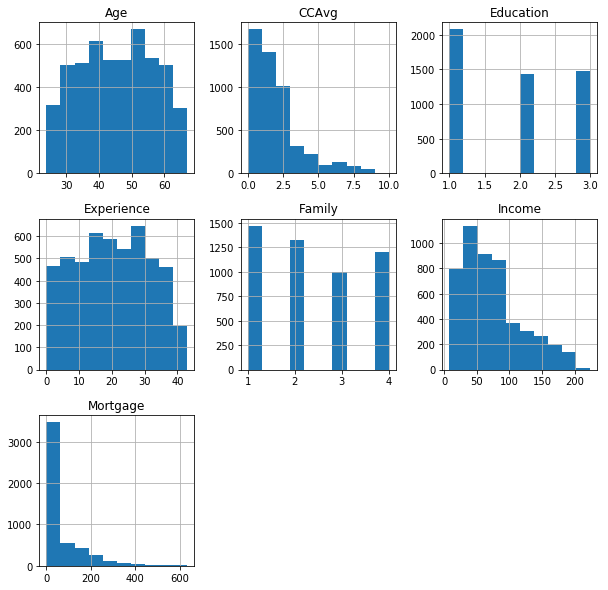

In [12]:
columns = df.iloc[:,0:7]
columns.hist(figsize=(10,10))

### Observations

# Bivariate plots

C:\Users\Ramya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


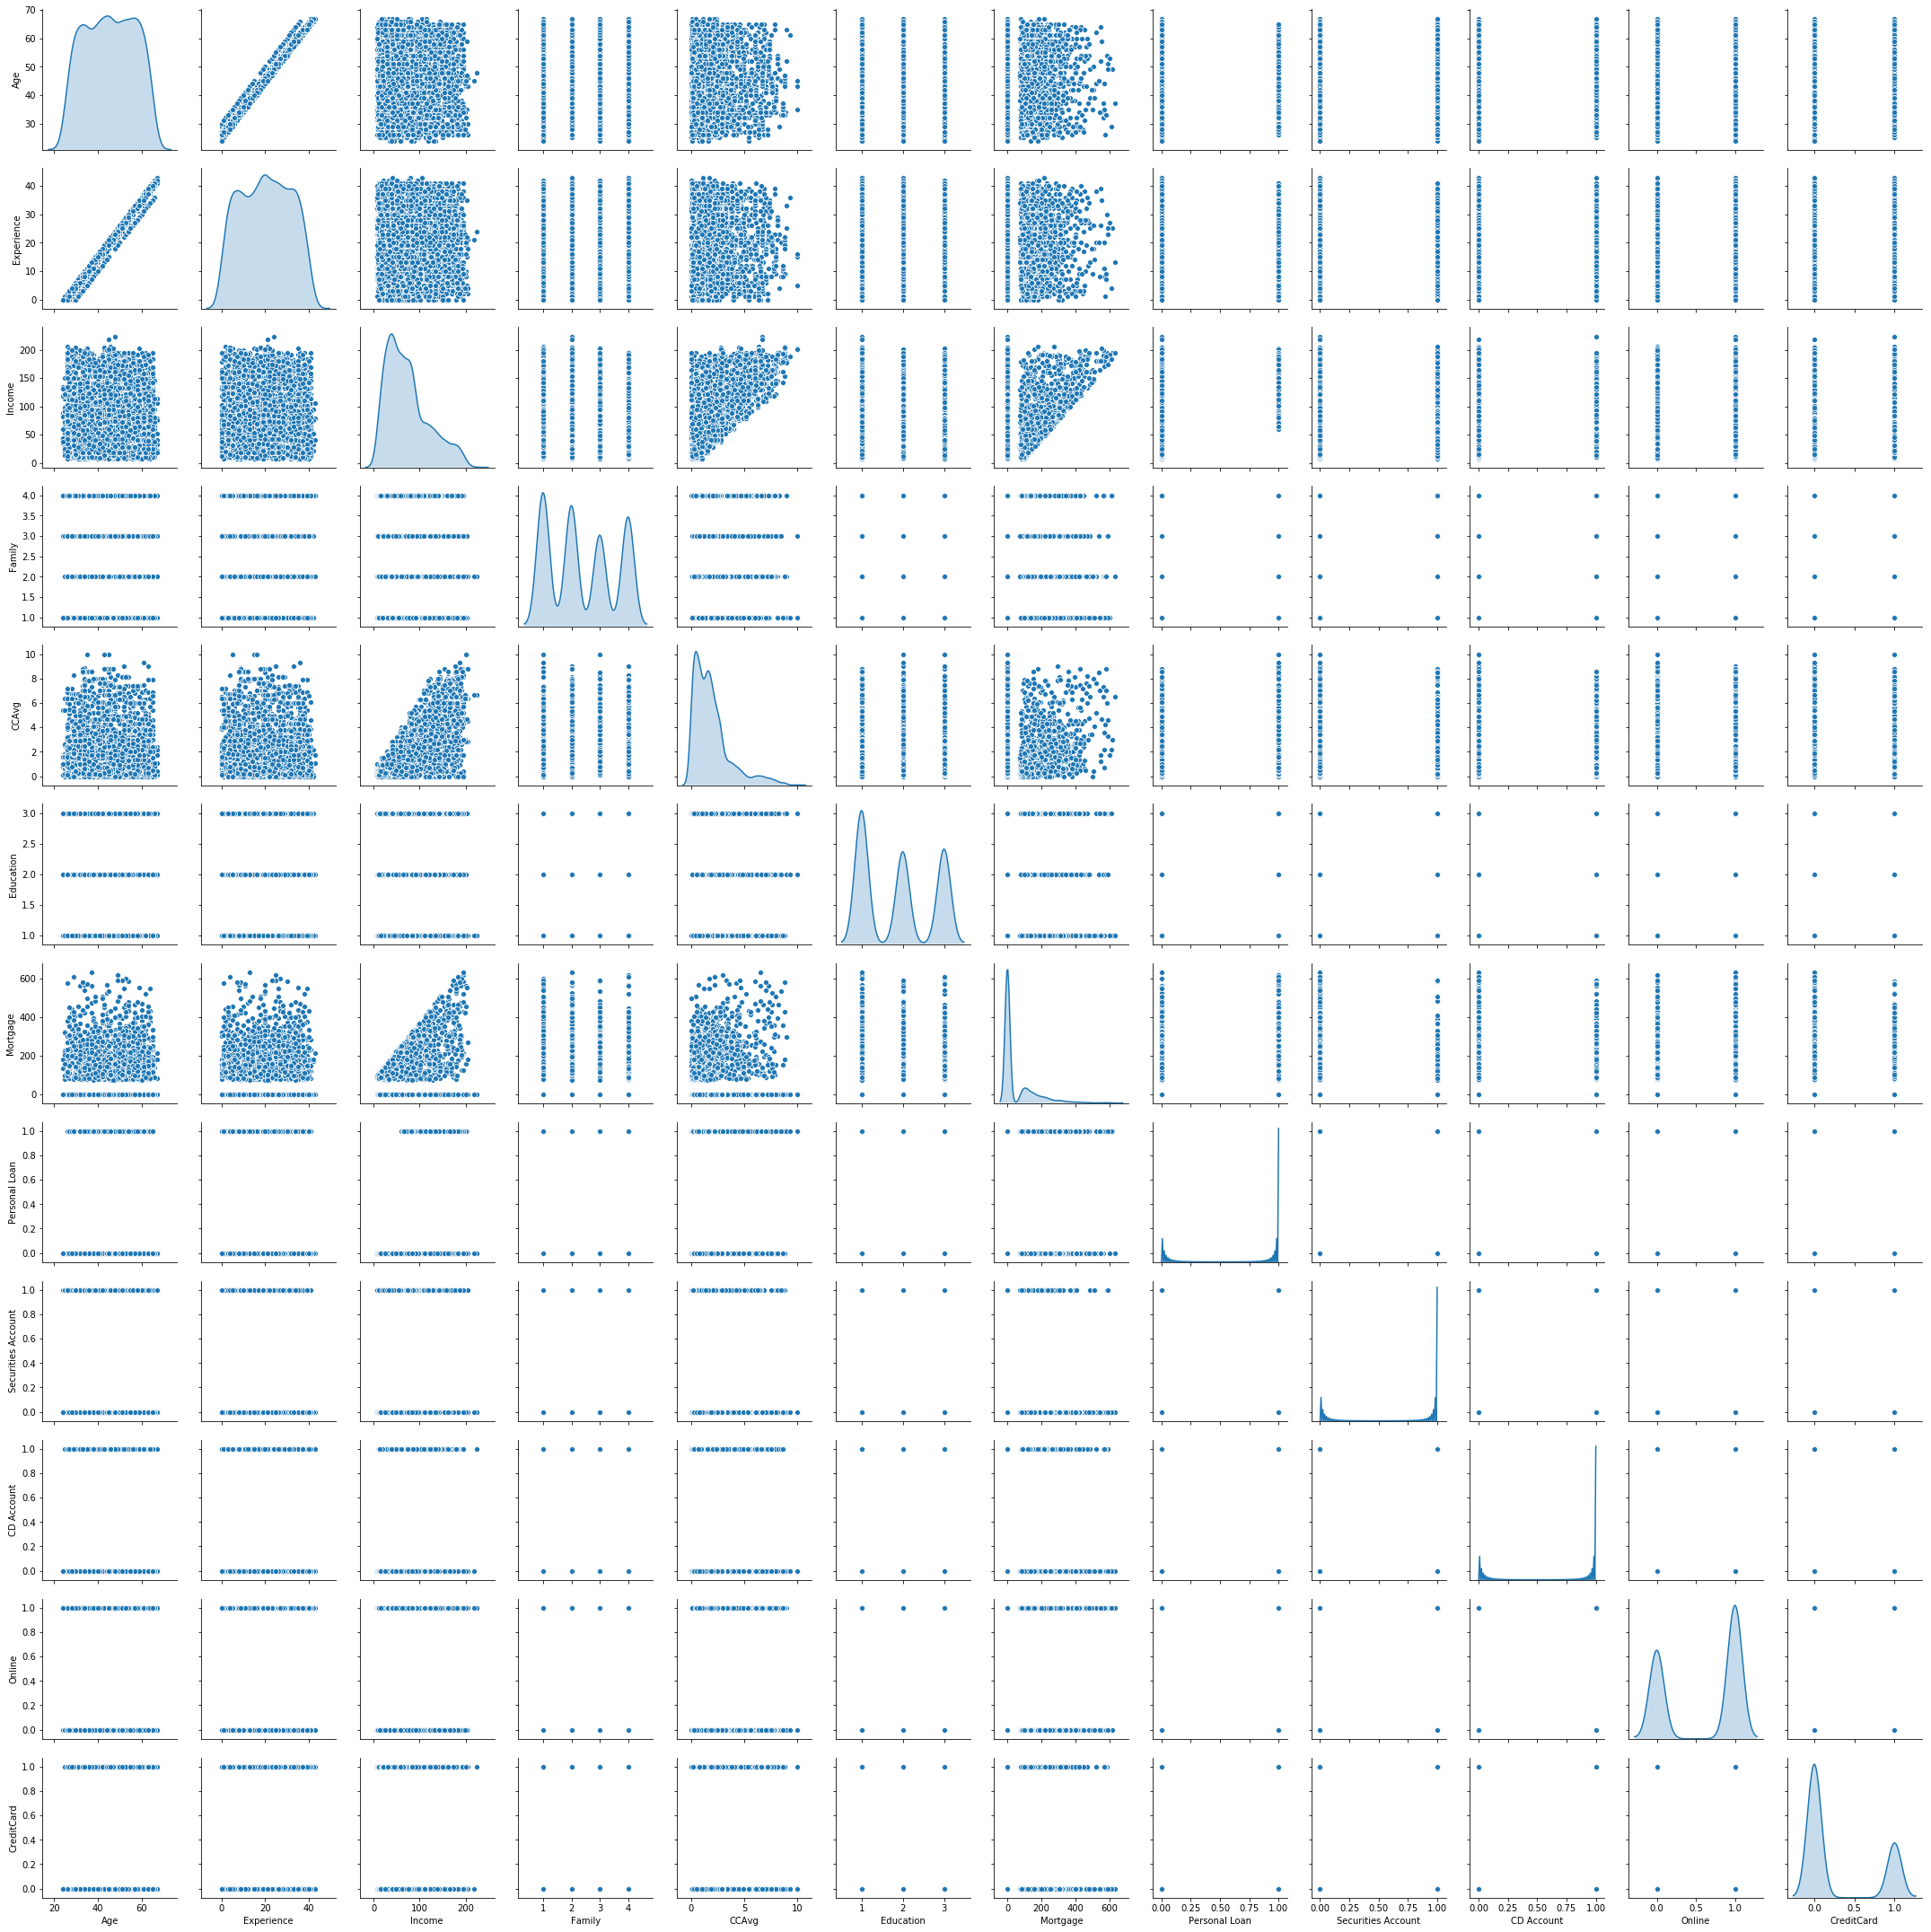

In [13]:
sns.pairplot(df, diag_kind='kde')

In [14]:
corr = df.corr()
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994077,-0.058078,-0.039393,-0.050963,0.046275,-0.015385,-0.014329,0.000357,0.003156,0.013828,0.007217
Experience,0.994077,1.000000,-0.049168,-0.045479,-0.048847,0.018197,-0.013269,-0.014013,-0.000353,0.005526,0.013222,0.009053
Income,-0.058078,-0.049168,1.000000,-0.154781,0.646369,-0.188247,0.207769,0.504553,-0.001571,0.170637,0.012567,-0.003057
Family,-0.039393,-0.045479,-0.154781,1.000000,-0.106247,0.063476,-0.018406,0.064175,0.021339,0.016162,0.005530,0.015152
CCAvg,-0.050963,-0.048847,0.646369,-0.106247,1.000000,-0.134255,0.111133,0.369912,0.013350,0.138157,-0.005587,-0.005688
Education,0.046275,0.018197,-0.188247,0.063476,-0.134255,1.000000,-0.033336,0.137756,-0.008014,0.014250,-0.012655,-0.013541
Mortgage,-0.015385,-0.013269,0.207769,-0.018406,0.111133,-0.033336,1.000000,0.143906,-0.001739,0.090667,-0.011448,-0.003164
Personal Loan,-0.014329,-0.014013,0.504553,0.064175,0.369912,0.137756,0.143906,1.000000,0.023352,0.316355,0.003361,0.004962
Securities Account,0.000357,-0.000353,-0.001571,0.021339,0.013350,-0.008014,-0.001739,0.023352,1.000000,0.319659,0.013132,-0.014699
CD Account,0.003156,0.005526,0.170637,0.016162,0.138157,0.014250,0.090667,0.316355,0.319659,1.000000,0.173921,0.281158


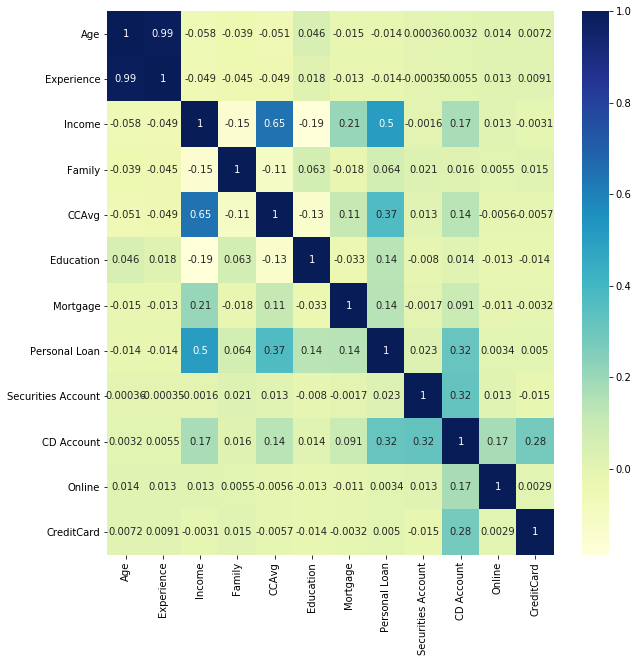

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu', annot=True)

### Observations

C:\Users\Ramya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


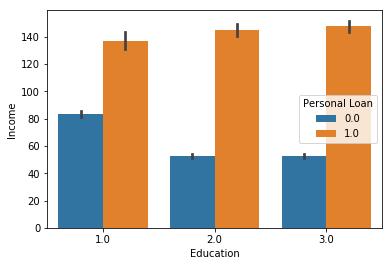

In [16]:
sns.barplot(data=df, x='Education', y='Income', hue='Personal Loan')

### Observation:

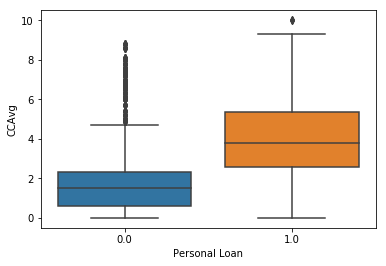

In [17]:
sns.boxplot(data = df, x = 'Personal Loan', y = 'CCAvg')


### Observation

C:\Users\Ramya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


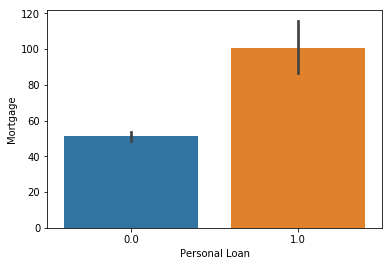

In [18]:
sns.barplot(data=df, x='Personal Loan', y='Mortgage')

### Observation

C:\Users\Ramya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


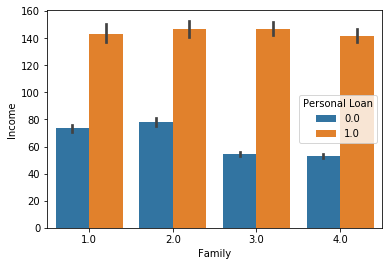

In [19]:
sns.barplot(data=df, x='Family', y='Income', hue='Personal Loan')

### Observation

# Logistic Regression

In [20]:
X = df.drop('Personal Loan', axis=1)
y = df[['Personal Loan']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

logit=LogisticRegression(solver='liblinear')
logit.fit(X_train,y_train)


C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_predict=logit.predict(X_test)

In [23]:
# Get coefficients and the intercept
coeff = pd.DataFrame(logit.coef_, columns = X.columns, index=['Coefficient'])
coeff

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Coefficient,-0.406041,0.4012,0.049423,0.668762,0.159186,1.675882,0.000828,-0.92717,3.276317,-0.596554,-0.990369


In [24]:
print(logit.intercept_)

[-2.40021288]


In [25]:
print('Accuracy(Train Data):{0:0.2f}%'.format((logit.score(X_train,y_train))*100))
print('Accuracy(Test Data): {0:0.2f}%'.format((logit.score(X_test,y_test))*100))

Accuracy(Train Data):95.20%
Accuracy(Test Data): 94.60%


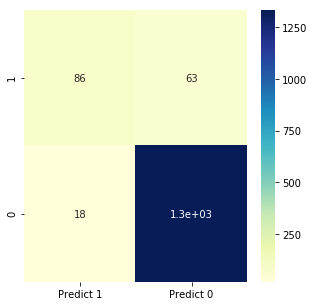

In [26]:
# Get Confusion Matrix

cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index= ['1','0'])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')

### Observation

In [27]:
# Classification Report
print(metrics.classification_report(y_test, y_predict, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.83      0.58      0.68       149
          0       0.95      0.99      0.97      1351

avg / total       0.94      0.95      0.94      1500



## ROC Curve and AUC value

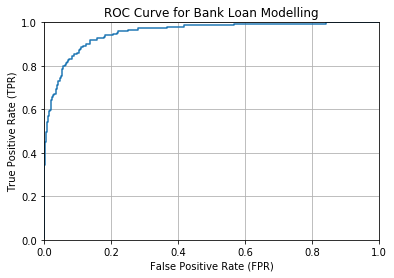

In [28]:
y_predict_prob = logit.predict_proba(X_test)[:,1]

#For a given X_test say ((1,2,3), (4,5,6), (7,8,9)) and y_class = 0,1 we get y_proba for both classes
# 0 and 1 i.e. y_predict_prob = ((0.9,0.5), (0.3,0.7), (0.3, 0.4)) where [:,0] all output for class0 at
#index[0] whereas index[1]=[:,1]= class 1

#The function takes both the true outcomes (0,1) from the test set and the predicted probabilities 
#for the 1 class. The function returns the false positive rates for each threshold (fpr), true positive 
#rates for each threshold (tpr) and thresholds (threshold) as shown below.

fpr,tpr,threshold = metrics.roc_curve(y_test, y_predict_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for Bank Loan Modelling')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)

In [29]:
print('AUC score is:{0:0.2f}%'.format((metrics.roc_auc_score(y_test, y_predict_prob))*100))

AUC score is:95.28%


# Variance Inflation Factor (VIF)

# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nbayes=GaussianNB()
nbayes.fit(X_train, y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [31]:
y_predict_nbayes = nbayes.predict(X_test)

In [32]:
print('Accuracy(Train Data):{0:0.2f}%'.format((nbayes.score(X_train,y_train))*100))
print('Accuracy(Test Data):{0:0.2f}%'.format((nbayes.score(X_test,y_test))*100))

Accuracy(Train Data):89.20%
Accuracy(Test Data):87.67%


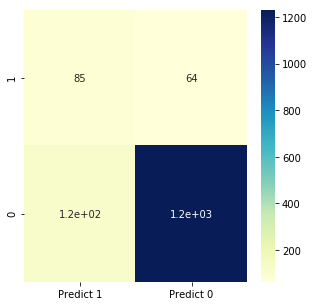

In [33]:
cm = metrics.confusion_matrix(y_test, y_predict_nbayes, labels=[1,0])

df_cm = pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index = ['1','0'])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')

### Observation

In [34]:
print(metrics.classification_report(y_test,y_predict_nbayes, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.41      0.57      0.48       149
          0       0.95      0.91      0.93      1351

avg / total       0.90      0.88      0.89      1500



# K-Nearest Neighbors (KNN)

In [44]:
# feature scaling

from scipy.stats import zscore
X.iloc[:,0:7]=X.iloc[:,0:7].apply(lambda x: zscore(x))
X.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.825984,-1.717717,-0.538651,1.410810,-0.190568,-1.053661,-0.55244,1.0,0.0,0.0,0.0
1,-0.049890,-0.117989,-0.865602,0.535943,-0.248073,-1.053661,-0.55244,1.0,0.0,0.0,0.0
2,-0.582719,-0.473484,-1.366928,-1.213790,-0.535600,-1.053661,-0.55244,0.0,0.0,0.0,0.0
3,-0.937937,-1.006727,0.572985,-1.213790,0.441991,0.143409,-0.55244,0.0,0.0,0.0,0.0
4,-0.937937,-1.095601,-0.625838,1.410810,-0.535600,0.143409,-0.55244,0.0,0.0,0.0,1.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
NNH.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [47]:
print('Accuracy(Train Data):{0:0.2f}%'.format((NNH.score(X_train,y_train))*100))
print('Accuracy(Test Data):{0:0.2f}%'.format((NNH.score(X_test,y_test))*100))

Accuracy(Train Data):100.00%
Accuracy(Test Data):96.13%


In [48]:
y_predict_KNN=NNH.predict(X_test)

### Choosing k-value

C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Ramya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

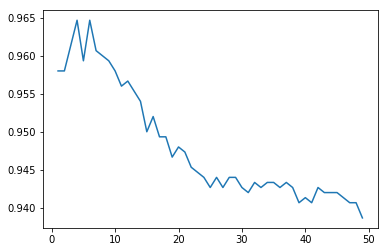

In [40]:
Accuracy = []
for k in range(1,50):
    NNH=KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    NNH.fit(X_train,y_train)
    Accuracy.append(NNH.score(X_test,y_test))

plt.plot(range(1,50),Accuracy)    
    

### Observation:

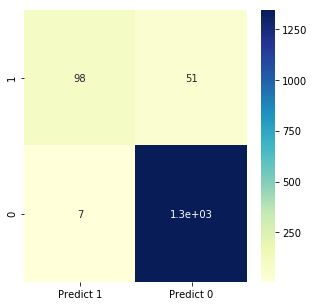

In [41]:
cm = metrics.confusion_matrix(y_test, y_predict_KNN, labels=[1,0])

df_cm=pd.DataFrame(cm, columns=['Predict 1', 'Predict 0'], index = ['1','0'])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, cmap='YlGnBu', annot=True)

### Observations:

In [42]:
print(metrics.classification_report(y_test, y_predict_KNN, labels=[1,0]))

             precision    recall  f1-score   support

          1       0.93      0.66      0.77       149
          0       0.96      0.99      0.98      1351

avg / total       0.96      0.96      0.96      1500



# Compare Model Accuracy 

In [43]:
compare = pd.DataFrame({'LogisticRegression':['95.20 %', '94.60 %'], 'Naive Bayes':['89.20 %','87.67 %'], 'KNN':['100 %', '96.13 %']}, index=['Train','Test'])
compare

,LogisticRegression,Naive Bayes,KNN
Train,95.20 %,89.20 %,100 %
Test,94.60 %,87.67 %,96.13 %


# Conclusion